#**Demostração - Aula 4**

###**Configuração inicial para a aula**

- Download do arquivo **(cbow_s300.zip)** de Word Embeddings Pré-treinadas em Portugûes (CBOW)
 * Repositório original: http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc
 * Repositório do professor: https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip

- Descompacte o arquivo (conforme exemplo abaixo)
- Grave localmente ou no seu drive do Google Drive (conforme exemplo abaixo)
- Exsecute os demais passos de processamento usando a biblioteca Gensim

In [ ]:
# dependências de bibliotecas que vamos utilizar na Demo
!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg
!python -m spacy download en_core_web_lg

**Obs:** pode ser necessário reunicar o runtime (ambiente) do colab

In [ ]:
# Download do arquivo no repositório do professor
!wget 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip'
!ls -la
# veja o nome do arquivo compactado salvo pelo download

--2023-11-28 18:55:19--  https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip
Resolving dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)... 3.5.234.171, 16.12.0.66, 52.95.165.7, ...
Connecting to dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)|3.5.234.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929305948 (886M) [application/zip]
Saving to: ‘cbow_s300.zip’

cbow_s300.zip       100%[===================>] 886.25M  24.1MB/s    in 39s     

2023-11-28 18:55:58 (22.8 MB/s) - ‘cbow_s300.zip’ saved [929305948/929305948]

total 907548
drwxr-xr-x 1 root root      4096 Nov 28 18:55 .
drwxr-xr-x 1 root root      4096 Nov 28 18:53 ..
-rw-r--r-- 1 root root 929305948 Feb 16  2021 cbow_s300.zip
drwxr-xr-x 4 root root      4096 Nov 22 14:24 .config
drwxr-xr-x 1 root root      4096 Nov 22 14:27 sample_data


In [ ]:
# Descompactação do arquivo
!unzip 'cbow_s300.zip' # subistitua com nome do arquivo
!ls -la

Archive:  cbow_s300.zip
  inflating: cbow_s300.txt           
total 3501348
drwxr-xr-x 1 root root       4096 Nov 28 18:55 .
drwxr-xr-x 1 root root       4096 Nov 28 18:53 ..
-rw-r--r-- 1 root root 2656045531 Oct  4  2018 cbow_s300.txt
-rw-r--r-- 1 root root  929305948 Feb 16  2021 cbow_s300.zip
drwxr-xr-x 4 root root       4096 Nov 22 14:24 .config
drwxr-xr-x 1 root root       4096 Nov 22 14:27 sample_data


In [ ]:
# Load do modelo pelo Gensim
from gensim.models import KeyedVectors

model_cbow = KeyedVectors.load_word2vec_format('cbow_s300.txt')

In [33]:
model_cbow

**Obs:** Mantenha sua sessão do Colab ativa até o exercício.

<br>

##**Análise Semântica em NLP**

---

<br>
<font size=4>
Como falamos, o próximo passo é realizar uma análise semântica dos dados, onde buscaremos entender o significado de cada palavra e como a mesma interage no texto!
</font>
</br>
</br>

---

### Outra técnica utilizada e considerada mais eficaz nesse processo é o **mapa de vetores multidimensional**, onde cada palavra é representada por coordenadas de forma matemática (números) e visa representar cada palavra ou sentença. Dessa forma conseguimos calcular a distância de cada vetor e analisar a proximidade linguística de cada palavra ou sentença e associar a um determinado contexto como exemplo. Veja abaixo um exemplo simbólico da representação desse vetor:

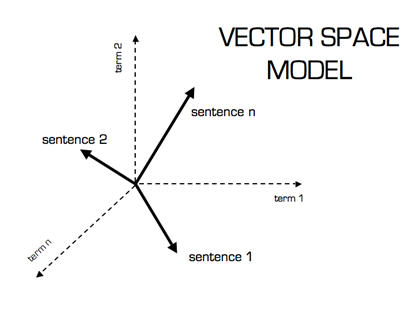

<br/>

## **Word Embeddings**

## Word Embedding é conjunto de modelos para mineração de textos, ou seja, é mais uma técnica de pré-processamento em NLP, onde os textos são transformados e **as palavras representadas por um vetor na forma numérica**, ou seja, em uma representação matemática de cada palavra.
<br/>

## Até aqui vimos implementações usando modelos com **bag of words**, onde as palavras são representadas em vetores grandes e esparsos que podem representar todo o corpus ou documento, as implementações com modelos de **word embeddings** utilizam representações de **vetores densos de tamanho fixo** que são capazes de armazenar informações sobre o contexto e significado dos documentos.
<br/>

## Depois de definido a técnica e o vetor na abordagem com word embedding, cada palavra é representada por um ponto em um espaço multidimensional (**embedding space**) e como falamos, cada palavra é representada de forma numérica no vetor, que na verdade são os pontos/dimensões de cada palavra.
<br/>


![alt text](https://d17h27t6h515a5.cloudfront.net/topher/2017/March/58c0aaf4_linear-relationships/linear-relationships.png)

<br/>

### Exemplo de visualização de um Embedding: https://projector.tensorflow.org/
<br/>

### Existem dois modelos mais conhecidos de aplicação Word Embeddings, são eles:

-
### **Word2Vec**, que foi desenvolvido por Tomas Mikolov e pode utilizar algoritmos diferentes e são baseados em redes neurais, são eles:
  -
###  **Continuous Bag-of-Words (CBOW)**: A ideia do algoritmo Continuous bag of words é prever qual a palavra que estamos buscando a partir de um determinado contexto. Para isto a entrada da rede é um vetor one-hot encoded que represente as palavras do contexto e a sua saída é a palavra que estamos buscando.
  -
###  **Skip-Gram**: A abordagem do Skip-gram é a inversa, tomando como ponto de partida uma determinada palavra, o objetivo é prever o contexto do qual esta palavra veio. Para isto a entrada da rede é um vetor one-hot encoded que represente a palavra que estamos buscando e a sua saída, as palavras do contexto.


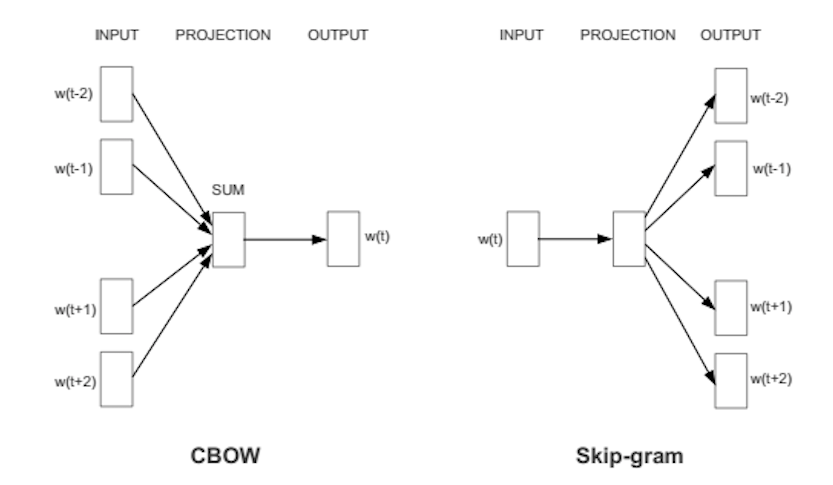

Outro modelo conhecido:

-
###  **GloVe (Global Vectors for Word Representation)**, desenvolvido por Pennington em Stanford. É uma extensão do método Word2Vec, no entanto, ao invés de usar uma janela fixa para configurar o contexto, este método constrói a matriz co-occurrence usando estatísticas extraídas do próprio texto.

<br/>

https://wiki.pathmind.com/word2vec


<br/>

---
<br/>

### Sendo mais especifico, **Word Embeddings** é um modelo de rede neural para representar dados com um grande número de classes de forma mais eficiente. Os Embeddings melhoram muito a capacidade das redes neurais de aprender com dados desse tipo, representando os dados com vetores de menor dimensão.

### Word Embeddings em particular são interessantes porque as redes são capazes de aprender relações semânticas entre as palavras. Por exemplo, os embeddings saberão que o equivalente masculino de uma rainha é um rei.

<br/>



<br/>

### Para quem se interessar em saber mais sobre Word Embeddings, abaixo estão boas referências!

  
1.   [Uma visão geral conceitual muito boa do word2vec de Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)<br/>
2.   [Primeiro artigo sobre word2vec de Mikolov et al](https://arxiv.org/pdf/1301.3781.pdf)<br/>
3.   [Video de ilustração e implementação em Tensorflow](https://www.youtube.com/watch?v=64qSgA66P-8)<br/>
4.  [Modelos de Word Embeddings treinados em pt-br](http://nilc.icmc.usp.br/embeddings)


</font>

### Como o Word2Vec funciona?

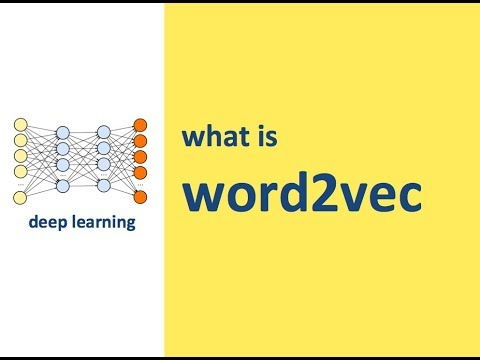

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("64qSgA66P-8")

https://www.youtube.com/watch?v=64qSgA66P-8

Outros modelos treinados com em Word2vec

Modelo treinado para saúde: https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/word-embeddings-para-saude/
<br/>
Modelos treinados com bases genéricas: http://www.nilc.icmc.usp.br/embeddings

<br/><br/>

## **Word2Vec com Spacy**
---

<font size=4>
Vamos utilizar os modelos em inglês e em português do SpaCy.
<br/>
Mais para frente vamos explorar outras formas de criar nosso próprio modelo Word2Vec.
<br/>
O modelo em português foi disponibilizado recentemente com o Word2Vec treinado.
<br/><br/>
</font>

In [ ]:
#!python -m spacy download en_core_web_lg
# reinicie o Runtime do colab

<font size=4>
A forma mais simples de explorar a similaridade de palavras atravez do Word2Vec é usando o método `.similarity`.
</font>


In [36]:
import spacy

en = spacy.load('en_core_web_lg')

tokens = en(u'banana cat dog')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

banana banana 1.0
banana cat 0.2235882580280304
banana dog 0.2090904712677002
cat banana 0.2235882580280304
cat cat 1.0
cat dog 0.8220816850662231
dog banana 0.2090904712677002
dog cat 0.8220816850662231
dog dog 1.0


In [ ]:
'''
# Outra forma de carregar o Spacy
import en_core_web_lg
en = en_core_web_lg.load()
'''

<br/>

Outro exemplo de similaridade:

In [38]:
import spacy
import numpy as np

en = spacy.load('en_core_web_lg')

def most_similar(word):
  ms = en.vocab.vectors.most_similar(np.asarray([en.vocab.vectors[en.vocab.strings[word]]]), n=10)
  palavras_similares = [en.vocab.strings[w] for w in ms[0][0]]
  distances = ms[2]
  return palavras_similares

most_similar('dog')

['dog',
 'dogs',
 'cat',
 'puppy',
 'pet',
 'pup',
 'canine',
 'wolfdogs',
 'dogsled',
 'uppy']

###**Spacy com Word2Vec em Português**
O Spacy implementou novos modelos além do padrão sem word2vec (pt = pt_core_news_sm)

pt_core_news_sm = https://spacy.io/models/pt / https://spacy.io/models/pt#pt_core_news_sm
<br>
pt_core_news_md = https://spacy.io/models/pt#pt_core_news_md
<br>
pt_core_news_lg = https://spacy.io/models/pt#pt_core_news_lg


Exemplo 1: usando o Spacy em potuguês, porém o modelo pt (pt_core_news_sm) não é efetivo, pois não tem implementação do word2vec

In [39]:
import spacy
pt = spacy.load('pt_core_news_sm')

tokens = pt(u'banana cachorro gato')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

banana banana 1.0
banana cachorro 0.21581971645355225
banana gato 0.31536203622817993
cachorro banana 0.21581971645355225
cachorro cachorro 1.0
cachorro gato 0.3709920048713684
gato banana 0.31536203622817993
gato cachorro 0.3709920048713684
gato gato 1.0


<ipython-input-39-cf27e42794dd>:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(token1.text, token2.text, token1.similarity(token2))


In [40]:
# sando o Spacy em potuguês com o modelo de word2vec
import spacy
import pt_core_news_lg

pt = spacy.load('pt_core_news_lg')

tokens = pt(u'banana cachorro gato')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

banana banana 1.0
banana cachorro 0.3059433102607727
banana gato 0.1974039524793625
cachorro banana 0.3059433102607727
cachorro cachorro 1.0
cachorro gato 0.8368197083473206
gato banana 0.1974039524793625
gato cachorro 0.8368197083473206
gato gato 1.0


<font size=5>
Dado que cada palavra tem seu vetor de representação que leva em consideração o contexto em que a mesma esta inserida, é possível calcular o cosseno de similaridade!
</font>

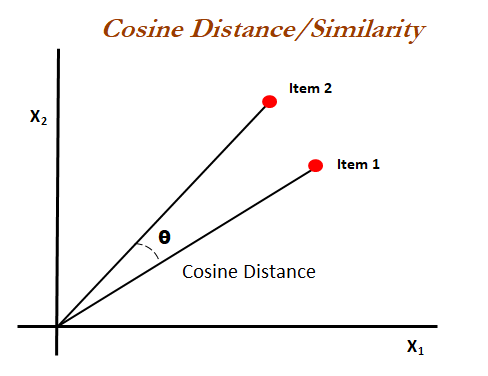

In [ ]:
import spacy
import numpy as np

nlp = spacy.load('pt_core_news_lg')

king = nlp.vocab['rei'].vector
man = nlp.vocab['homem'].vector
woman = nlp.vocab['mulher'].vector

new_vector = (king - man) + woman

new_vector

In [43]:
from scipy import spatial

new_vector = (king - man) + woman

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
computed_similarities = []

for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word.text, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

computed_similarities[:4]

[('rei', 0.8917216062545776),
 ('mulher', 0.36437276005744934),
 ('homem', 0.17508389055728912),
 ('dom', 0.14074578881263733)]

<br/>

---
<br/>

### Acredito que estão se perguntando, onde vamos usar isso e como, certo?
<br/>

### Você pode usar este modelo em inúmeras aplicações, por exemplo, pesquisa de produtos ou serviços por meio de suas descrições ou até mesmo em aplicações mais complexas de análise de sentimentos e classificação de documentos.
<br/>

---
<br/>


<br/>

## **Word2Vec com Gensim**

<br/>
<font size=4>
Gensim é mais uma das libs disponíveis em Python para tarefas de NLP! Ao contrários das outras opções, essa é uma ferramenta mais especializada em tarefas de modelagem de tópicos e análise de similaridade!
<br/><br/>
Sua instalação é muito simples!
<br/><br/>
</font>


In [ ]:
# Instalação do pacote Gensim e dependência
#!pip install gensim==4.3.2

In [44]:
import gensim
print(gensim.__version__)

4.3.2


###**Configuração inicial para a aula**

- Download do arquivo **(cbow_s300.zip)** de Word Embeddings Pré-treinadas em Portugûes (CBOW)
 * Repositório original: http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc
 * Repositório do professor: https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip

- Descompacte o arquivo (conforme exemplo abaixo)
- Grave localmente ou no seu drive do Google Drive (conforme exemplo abaixo)
- Exsecute os demais passos de processamento usando a biblioteca Gensim

In [ ]:
'''
# Download do arquivo no repositório do professor
!wget 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/cbow_s300.zip'
!ls -la
# veja o nome do arquivo compactado salvo pelo download

# Descompactação do arquivo
!unzip 'cbow_s300.zip' # subistitua com nome do arquivo
!ls -la

# Load do modelo pelo Gensim
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('cbow_s300.txt')
'''

###**Análise com CBOW em Português**

In [45]:
model_cbow

<br/>
<font size=4>
O código acima vai baixar o modelo treinado de Word2Vec usando CBOW com 300 posições em português.


Com o modelo disponível, podemos carrega-lo com a ajuda da classe **`KeyedVectors`** do Gensim e com esse modelo podemos fazer operações de análise semântica em português, veja:
</font>


<br/>

In [46]:
# cada palavra é representada por um vetor de 300 posições
model_cbow['cachorro']

array([-4.35630e-02, -3.28700e-02,  1.52735e-01, -1.56780e-02,
        1.21885e-01, -1.67688e-01, -1.02211e-01, -8.61910e-02,
        7.20490e-02, -9.83480e-02, -1.32587e-01, -5.61530e-02,
       -2.27587e-01, -4.27520e-02, -1.19845e-01,  9.87550e-02,
       -4.37438e-01, -3.22793e-01,  1.24080e-02,  4.43268e-01,
       -7.31800e-02,  6.97510e-02, -1.43725e-01,  5.14352e-01,
       -1.16800e-03, -1.34310e-02, -3.70520e-02, -8.89080e-02,
        1.96335e-01,  4.87740e-01,  2.35393e-01, -1.07754e-01,
        1.87188e-01,  2.02846e-01,  2.27027e-01, -2.00064e-01,
        1.33436e-01,  8.17870e-02, -8.45000e-02, -4.21550e-02,
        2.71060e-02,  2.91997e-01, -2.40926e-01,  2.06865e-01,
        4.74000e-04,  2.06211e-01,  1.27639e-01,  3.85590e-02,
        1.77177e-01, -1.23831e-01, -8.69900e-02, -1.10168e-01,
       -1.31033e-01,  3.20510e-02, -7.07600e-03, -8.86480e-02,
        2.12310e-02,  2.30504e-01,  1.59084e-01,  3.89300e-02,
        4.15100e-03, -9.12450e-02, -1.90750e-02,  6.809

In [47]:
len(model_cbow['cachorro'])

300

Análise de similaridade

In [48]:
model_cbow.similarity('cachorro', 'gato')

0.5658017

In [49]:
model_cbow.similarity('cachorro', 'banana')

0.21468098

In [50]:
pairs = [
    ('carro', 'jipe'),
    ('carro', 'avião'),
    ('carro', 'bicicleta'),
    ('carro', 'cereal'),
    ('carro', 'filosofia'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model_cbow.similarity(w1, w2)))

'carro'	'jipe'	0.68
'carro'	'avião'	0.61
'carro'	'bicicleta'	0.42
'carro'	'cereal'	0.24
'carro'	'filosofia'	0.05


In [51]:
model_cbow.most_similar_cosmul(positive=['cachorro'], topn=4)

[('cão', 0.8745832443237305),
 ('cachorrinho', 0.8369466662406921),
 ('gambá', 0.8245760798454285),
 ('cãozinho', 0.8212025761604309)]

In [52]:
model_cbow.most_similar(positive=['gol'])

[('golo', 0.7651616930961609),
 ('golaço', 0.7137529253959656),
 ('hat-trick', 0.687732994556427),
 ('golaã§o', 0.6514890789985657),
 ('gol.', 0.6381649374961853),
 ('tento', 0.6108596324920654),
 ('pênalti', 0.5985515117645264),
 ('gols', 0.5833502411842346),
 ('penalti', 0.541047990322113),
 ('pãªnalti', 0.519834578037262)]

In [53]:
model_cbow.most_similar(positive=['gol','carro','vw'])

[('veículo', 0.6377103924751282),
 ('volkswagen', 0.5706163644790649),
 ('jetta', 0.5651793479919434),
 ('fusca', 0.5585430860519409),
 ('caminhão', 0.5496240258216858),
 ('passat', 0.5447294116020203),
 ('suv', 0.5398237705230713),
 ('chevette', 0.5388899445533752),
 ('jipe', 0.5376667380332947),
 ('gol.', 0.5262673497200012)]

In [54]:
model_cbow.most_similar_cosmul(positive=['rainha', 'homem'], negative=['mulher'])

[('rei', 0.8870742321014404),
 ('monarca', 0.8194573521614075),
 ('epigrama', 0.8095493316650391),
 ('mito', 0.8062155246734619),
 ('cardeal-rei', 0.7996988892555237),
 ('faraó', 0.797191321849823),
 ('pro-blema', 0.7968766093254089),
 ('fontanário', 0.7921295762062073),
 ('mago', 0.791897714138031),
 ('vídeo-clipe', 0.7916083335876465)]

In [55]:
model_cbow.doesnt_match(['fogo', 'água', 'terra', 'mar', 'ar', 'carro'])

'carro'

In [56]:
model_cbow.doesnt_match("cachorro almoço gato passarinho".split())

'almoço'

In [ ]:
# pode ser necessário instalar essa dependência do Gensim
!pip install POT==0.4.0

In [59]:
model_cbow.wmdistance('falou', 'taguarelou')

0.4503943517881298

In [62]:
model_cbow.wmdistance('Batatinha quando nasce', 'Pirulito que bate bate')

0.6247409742175248

In [63]:
model_cbow.wmdistance('Batatinha quando nasce', 'Batatinha se esparrama')

0.44451569085446885

### Análise de Componente Principal - PCA (Principal Component Analysis)

In [64]:
palavras = ['um', 'dois', 'três', 'quatro', 'dez', 'onze', 'vinte', 'homem', 'mulher', 'marido', 'esposa', 'casa', 'mesa', 'cadeira']

In [65]:
# Selecionares os dois principais componentes e os mostraremos em um scatter plot.
from sklearn.decomposition import PCA
import numpy as np

sample_vectors = np.array([model_cbow[palavra] for palavra in palavras])
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.0453743 ,  0.33772764],
       [-1.2444258 ,  0.07335746],
       [-1.4411286 ,  0.21697314],
       [-1.4246814 ,  0.24888164],
       [-1.6386641 ,  0.23907901],
       [-1.5718281 ,  0.07380209],
       [-1.4920576 , -0.02855898],
       [ 0.43695548, -0.8767222 ],
       [ 1.3898493 , -0.79357296],
       [ 0.67999953, -1.7405599 ],
       [ 1.6267622 , -1.6740521 ],
       [ 1.3778124 ,  0.26950768],
       [ 1.4439391 ,  1.5093452 ],
       [ 1.9028431 ,  2.1447928 ]], dtype=float32)

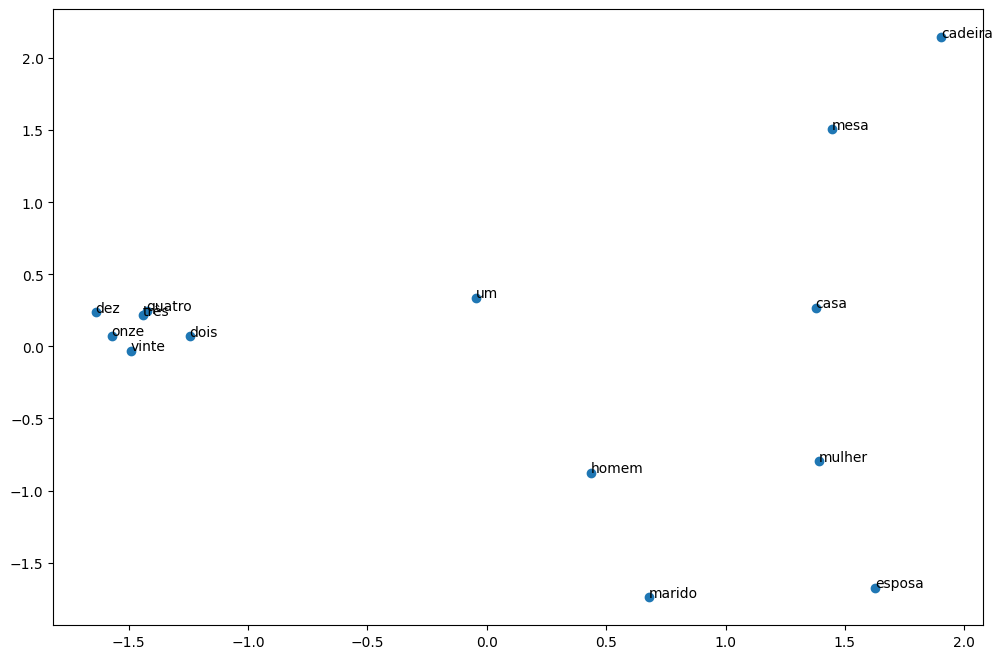

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(palavras):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

[Mais sobre PCA](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais)

['rei', 'rainha']


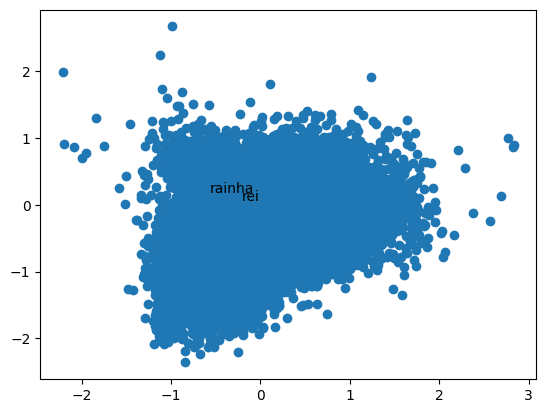

In [67]:
# Nesta etapa vamos usar PCA (Principal Component Analysis) para visualizar o modelo embedding que criamos.
# Selecionares os dois principais componentes e os mostraremos em um scatter plot.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model_cbow[model_cbow.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# criando o scatter plot (Gráfico de dispersão)
plt.scatter(result[:, 0], result[:, 1])

# selecionamos apenas duas palavras para aparecer na visualização
words = ['rei','rainha']

print(words)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

###**Exercício**

1.   Crie uma função que substitua uma ou mais palavras de um texto um uma palavra similar com base na sua classe gramatical.

### Dicas:
- Crie uma função que receba como parâmetro: a frase, a classe gramatical e o sentido (palavra no mesmo sentido - positivo)
- Use o Spacy para localizar a marcação POS Tag
- Use o modelo Word2Vec que treinanmos para localizar a similaridade


In [ ]:
# resposta

## **Criando nosso próprio modelo de similaridade**

---

Vamos usar modelos de Word Embedding através de vetores.

In [68]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [69]:
# Vamos usar nosso dataframe de produtos
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

In [70]:
# Tokenizando o texto
df['tokens'] = df.texto.apply(word_tokenize)

In [71]:
# Treinando nosso modelo com o nosso vocabulário
modelo_produto = Word2Vec(df['tokens'], vector_size=100, min_count=5, sg=0)

# Treina o modelo. Note que estamos setando o parametro sd = 0, ou seja, o algoritmo utilizado sera o CBOW
# Outro ponto de destaque é que quando setamos o parametro min_count para 1 estamos forcando o uso de todas as palavras.

**size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word). <br/>
**window**: (default 5) The maximum distance between a target word and words around the target word.<br/>
**min_count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.<br/>
**workers**: (default 3) The number of threads to use while training.<br/>
**sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).<br/>

Referência: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
'''
from google.colab import drive
drive.mount('/content/gdrive')

# Salva o modelo
modelo_produto.save('/content/gdrive/MyDrive/model.bin')
!ls -la /content/gdrive/MyDrive/model.bin

# Carrega o modelo
modelo_produto = Word2Vec.load('/content/gdrive/MyDrive/model.bin')
'''

In [72]:
# Salva o modelo
modelo_produto.save('model.bin')

In [73]:
!ls -la

total 3510216
drwxr-xr-x 1 root root       4096 Nov 28 19:46 .
drwxr-xr-x 1 root root       4096 Nov 28 18:53 ..
-rw-r--r-- 1 root root 2656045531 Oct  4  2018 cbow_s300.txt
-rw-r--r-- 1 root root  929305948 Feb 16  2021 cbow_s300.zip
drwxr-xr-x 4 root root       4096 Nov 22 14:24 .config
-rw-r--r-- 1 root root    9079925 Nov 28 19:46 model.bin
drwxr-xr-x 1 root root       4096 Nov 22 14:27 sample_data


In [74]:
# Carrega o modelo
model_novo = Word2Vec.load('model.bin')

# Exibe os parametros do meodelo treinado
print(model_novo)

Word2Vec<vocab=10930, vector_size=100, alpha=0.025>


In [75]:
# Buscando similaridade de palavras com o nosso vocabulário
model_novo.wv.most_similar(positive=['maquiagem'], topn=10)

[('auxilia', 0.9070642590522766),
 ('profissional', 0.8972384333610535),
 ('base', 0.8969401717185974),
 ('aplicar', 0.8594491481781006),
 ('corretivo', 0.8486472368240356),
 ('blush', 0.8402973413467407),
 ('ideal', 0.8308839201927185),
 ('delicada.Material', 0.8259078860282898),
 ('perfeita', 0.8246539831161499),
 ('sobrancelhas', 0.8239556550979614)]

In [76]:
# Buscando similaridade de palavras com o nosso vocabulário
model_novo.wv.most_similar_cosmul(positive=['romance'])
model_novo.wv.most_similar_cosmul(positive=['mistério'])

[('antigo', 0.9710010886192322),
 ('reino', 0.9697025418281555),
 ('acidente', 0.9680251479148865),
 ('misterioso', 0.967445969581604),
 ('crime', 0.9671403765678406),
 ('último', 0.9663380980491638),
 ('bruxo', 0.9655529856681824),
 ('maravilhoso', 0.9639176726341248),
 ('isolado', 0.9636073708534241),
 ('sob', 0.9634446501731873)]

In [ ]:
#!pip install POT==0.4.0

In [77]:
# Comparando duas palavras
model_novo.wv.wmdistance('maquiagem', 'base')

0.41871847449205574

In [78]:
# Comparando duas palavras
model_novo.wv.wmdistance('maquiagem', 'brinquedo')

0.7501624568771974

#Extra!


## **Outra forma de criar modelos de similaridade (mais simples)**

---


Usando matrix de similaridade e TF-IDF


Referência: https://hackinganalytics.com/2020/03/01/comparando-textos-com-tf-idf-e-cosine-similarity-no-gensim/

###### Sou autorizado a replicar esse conteúdo


In [79]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

#import gensim.downloader as api

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
# Cria os dados de treino. Exemplo simples para fins didático.
lista = [
    [1, 'Este servico e oferecido em Sao Paulo'],
    [2, 'Este servico e oferecido no Rio de Janeiro'],
    [3, 'Este servico e oferecido em Tocantins'],
    [4, 'Este servico e oferecido na Bahia']]

df = pd.DataFrame(data = lista, columns = ['id', 'descicao'])
df.head()

,id,descicao
0,1,Este servico e oferecido em Sao Paulo
1,2,Este servico e oferecido no Rio de Janeiro
2,3,Este servico e oferecido em Tocantins
3,4,Este servico e oferecido na Bahia


In [81]:
# Transforma a descrição em tokens
df['tokens'] = df.descicao.apply(word_tokenize)

# Cria um dicionario com os tokens do dataframe
dct = Dictionary(df['tokens'])

# Converte corpus para o formato BOW (Bag Of Words)
corpus = [dct.doc2bow(line) for line in df['tokens']]

# Cria um modelo TF-IDF usando o gensim
model = TfidfModel(corpus)

Analisando cada objeto criado

In [82]:
# Sentença em tokens
df['tokens']

0        [Este, servico, e, oferecido, em, Sao, Paulo]
1    [Este, servico, e, oferecido, no, Rio, de, Jan...
2         [Este, servico, e, oferecido, em, Tocantins]
3             [Este, servico, e, oferecido, na, Bahia]
Name: tokens, dtype: object

In [83]:
# Cada plavra com sua identificação (id)
dct.token2id

{'Este': 0,
 'Paulo': 1,
 'Sao': 2,
 'e': 3,
 'em': 4,
 'oferecido': 5,
 'servico': 6,
 'Janeiro': 7,
 'Rio': 8,
 'de': 9,
 'no': 10,
 'Tocantins': 11,
 'Bahia': 12,
 'na': 13}

In [84]:
# Contagem de termos simples
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(0, 1), (3, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (11, 1)],
 [(0, 1), (3, 1), (5, 1), (6, 1), (12, 1), (13, 1)]]

In [85]:
# Deswcrição: Este servico e oferecido em Sao Paulo
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [86]:
# TF-IDF da deswcrição "Este servico e oferecido em Sao Paulo"
model[corpus[0]]

[(1, 0.6666666666666666), (2, 0.6666666666666666), (4, 0.3333333333333333)]

In [87]:
# Outro forma de salvar o modelo para reutilizar e produtizar
dct.save('dct')
model.save('model')

In [88]:
!ls -la

total 3510224
drwxr-xr-x 1 root root       4096 Nov 28 19:47 .
drwxr-xr-x 1 root root       4096 Nov 28 18:53 ..
-rw-r--r-- 1 root root 2656045531 Oct  4  2018 cbow_s300.txt
-rw-r--r-- 1 root root  929305948 Feb 16  2021 cbow_s300.zip
drwxr-xr-x 4 root root       4096 Nov 22 14:24 .config
-rw-r--r-- 1 root root        932 Nov 28 19:47 dct
-rw-r--r-- 1 root root       1235 Nov 28 19:47 model
-rw-r--r-- 1 root root    9079925 Nov 28 19:46 model.bin
drwxr-xr-x 1 root root       4096 Nov 22 14:27 sample_data


Aplicando as tranformações com a matriz TF-IDF treinada

In [89]:
dct_novo = Dictionary.load('dct')
model_novo = TfidfModel.load('model')

In [90]:
# Criando um texto de exemplo
novo_texto = 'Este servico e oferecido em Goias'
#novo_texto = 'Esse texto não tem nada haver'

# Transforma a descricao do servico em tokens de palavras
novo_texto_tokens = word_tokenize(novo_texto)

# Converte corpus para o formato BOW (Bag Of Words)
novo_texto_corpus = dct_novo.doc2bow(novo_texto_tokens)

# Extrai a matrix TF-IDF do novo texto
model_novo[novo_texto_corpus]

[(4, 1.0)]

Criando uma matriz de similaridades

In [91]:
# Cria a matriz de similaridade com base no corpus de entrada
#model_novo[corpus[0]]
#dct_novo.token2id
index = similarities.SparseMatrixSimilarity(model_novo[corpus], num_features=len(dct_novo))

# Salva a matriz
index.save('index')

Simulando

In [92]:
# Carregando as dependencias dos modelos
dct_novo = Dictionary.load('dct')
model_novo = TfidfModel.load('model')
index_novo = similarities.Similarity.load('index')

# Texto de exemplo
novo_texto = 'Este servico e oferecido em Goias'
#novo_texto = 'Esse texto não tem nada haver'
#novo_texto = 'Este servico e oferecido em Sao Paulo'

# Transforma a descricao em tokens
novo_texto_tokens = word_tokenize(novo_texto)

# Converte corpus para o formato BOW (Bag Of Words)
novo_texto_corpus = dct_novo.doc2bow(novo_texto_tokens)

tfidf = model_novo[novo_texto_corpus]

# Buscando a similaridade
sim = index_novo[tfidf]
sim

array([0.33333334, 0.        , 0.4472136 , 0.        ], dtype=float32)

In [93]:
df['sim'] = sim
df.head()

,id,descicao,tokens,sim
0,1,Este servico e oferecido em Sao Paulo,"[Este, servico, e, oferecido, em, Sao, Paulo]",0.333333
1,2,Este servico e oferecido no Rio de Janeiro,"[Este, servico, e, oferecido, no, Rio, de, Jan...",0.000000
2,3,Este servico e oferecido em Tocantins,"[Este, servico, e, oferecido, em, Tocantins]",0.447214
3,4,Este servico e oferecido na Bahia,"[Este, servico, e, oferecido, na, Bahia]",0.000000


### Analisando o resultado:

Veja que a matriz de similaridade compra os resultados com base na similadidades das palavras encontradas no corpus de origem

#***O que você achou da aula de hoje?***

Pelo aplicativo da FIAP ou pelo site

(Entrar no FIAP, e no menu clicar em Experience Survey)

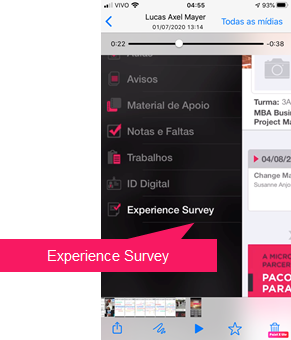